Proje1
index.iypnb

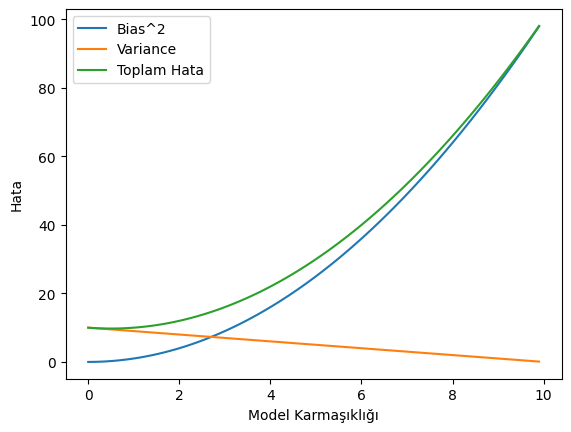

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Model karmaşıklığı
complexity = np.arange(0, 10, 0.1)

# Bias, Variance ve Toplam Hata
bias = complexity**2
variance = 10 - complexity
error = bias + variance

# Grafik çizimi
plt.plot(complexity, bias, label='Bias^2')
plt.plot(complexity, variance, label='Variance')
plt.plot(complexity, error, label='Toplam Hata')
plt.xlabel('Model Karmaşıklığı')
plt.ylabel('Hata')
plt.legend()
plt.show()


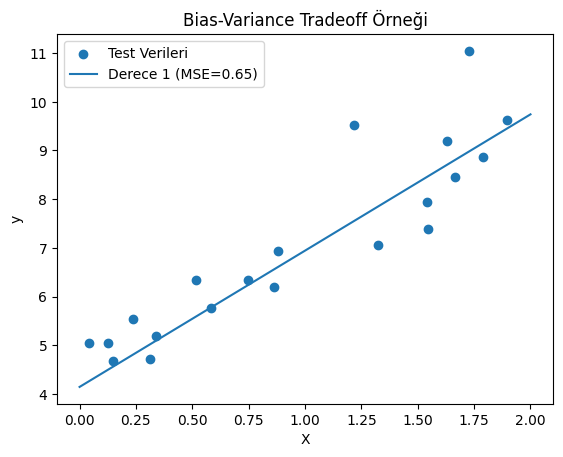

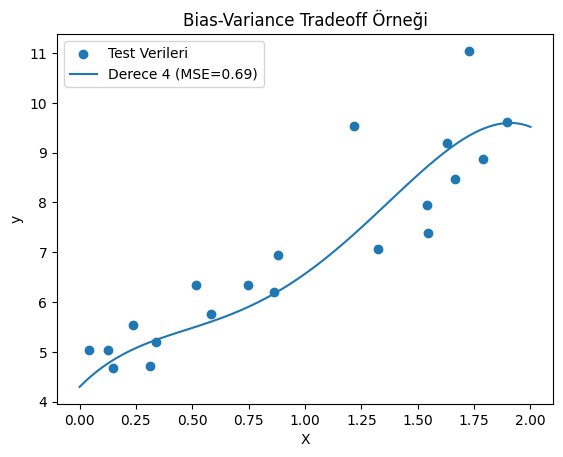

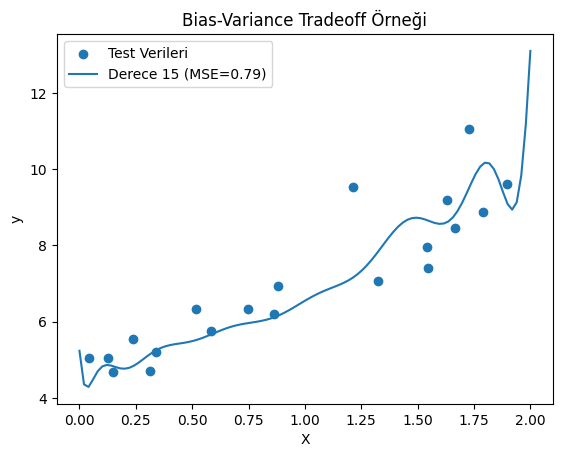

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Veri seti oluşturalım
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial regresyon modeli
def train_polynomial_model(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    return model

# Modeli değerlendirme fonksiyonu
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return mse

# Modelin performansını gözlemleyelim
degrees = [1, 4, 15]  # Farklı karmaşıklık seviyeleri

for degree in degrees:
    model = train_polynomial_model(degree)
    mse = evaluate_model(model, X_test, y_test)

    # Modelin tahminlerini görselleştirelim
    X_range = np.linspace(0, 2, 100).reshape(-1, 1)
    y_range_pred = model.predict(X_range)

    plt.scatter(X_test, y_test, label='Test Verileri')
    plt.plot(X_range, y_range_pred, label=f'Derece {degree} (MSE={mse:.2f})')
    plt.title('Bias-Variance Tradeoff Örneği')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

Daha düşük dereceli polinomlar genellikle düşük karmaşıklık ve yüksek bias'e sahipken, daha yüksek dereceli polinomlar genellikle yüksek karmaşıklık ve yüksek variance'e sahip olabilir. İdeal durum, bu iki özelliği dengede tutan bir model bulmaktır.